Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання
Будьте уважні, значення в отриманій вами таблиці можуть відрізнятися від значень у таблиці за посиланням(див.документацію)
Необхідно виконати:

In [6]:
import urllib
import pandas as pd

In [12]:
url = 'https://uk.wikipedia.org/wiki/Населення_України'
encoded_url = urllib.parse.quote (url, safe=":/")
table_name = "Коефіцієнт народжуваності в регіонах України"
data = pd.read_html(encoded_url, match = table_name, thousands="", decimal=',')
if data:
  df= data[0]
assert df is not None, "DATA NOT READ FROM THE WIKI"



Вивести перші рядки таблиці за допомогою методу head

In [13]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [15]:
df.shape

(28, 9)

Замініть у таблиці значення "—" на значення NaN

In [27]:
df_NaN = df.replace("—", "NaN")
print(df_NaN.head())


             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [29]:
df_type =  df.dtypes
print (df_type)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [48]:
df_change_type = df
df_change_type[df_change_type.columns[1:]] = df_change_type[df_change_type.columns[1:]].apply(pd.to_numeric, errors='coerce')
print (df_change_type.dtypes)


Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [51]:
df_isnull_sum = df.isnull().sum()
print (df_isnull_sum.head())

Регіон    0
1950      2
1960      1
1970      1
1990      0
dtype: int64


Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [56]:
df_dell_last = df.iloc[:-1]
print (df_dell_last.shape)
print (df_dell_last.tail())

(27, 9)
          Регіон  1950  1960  1970  1990  2000  2012  2014  2019
22     Черкаська  20.5  17.9  14.4  12.3   7.5  10.0   9.8   6.4
23   Чернівецька  24.7  21.8  17.0  14.8  10.1  12.8  12.9   9.2
24  Чернігівська  22.0  18.3  12.7  10.8   6.9   9.4   9.0   6.1
25          Київ   NaN  17.4  15.9  12.0   7.3  12.0  12.1  11.0
26   Севастополь   NaN   NaN   NaN  12.5   7.0  12.0   NaN   NaN


Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [61]:
df_mean = df.fillna(df.mean(numeric_only=True))
print(df.head())
print (df_mean.head())


             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
             Регіон  1950  1960  1970  1990  2000  2012       2014       2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.142308   8.020833
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.900000   7.600000
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.100000  10.100000
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.100000   7.100000
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.200000   8.020833



Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [67]:
df[ df['2019'] >= df['2019'].mean()][["Регіон", '2019']].sort_values(by='2019',ascending=False)


,Регіон,2019
25,Київ,11.0
16,Рівненська,10.7
6,Закарпатська,10.4
2,Волинська,10.1
23,Чернівецька,9.2
8,Івано-Франківська,8.8
14,Одеська,8.8
12,Львівська,8.7
20,Херсонська,8.1
27,Україна,8.1













У якому регіоні була найвища народжуваність у 2014 році?
Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

In [71]:
df_max = df.iloc[df['2014'].idxmax()]['Регіон']
print (df_max)

Рівненська


In [73]:
df['2014'].idxmax()

16

In [77]:
import matplotlib.pyplot as plt


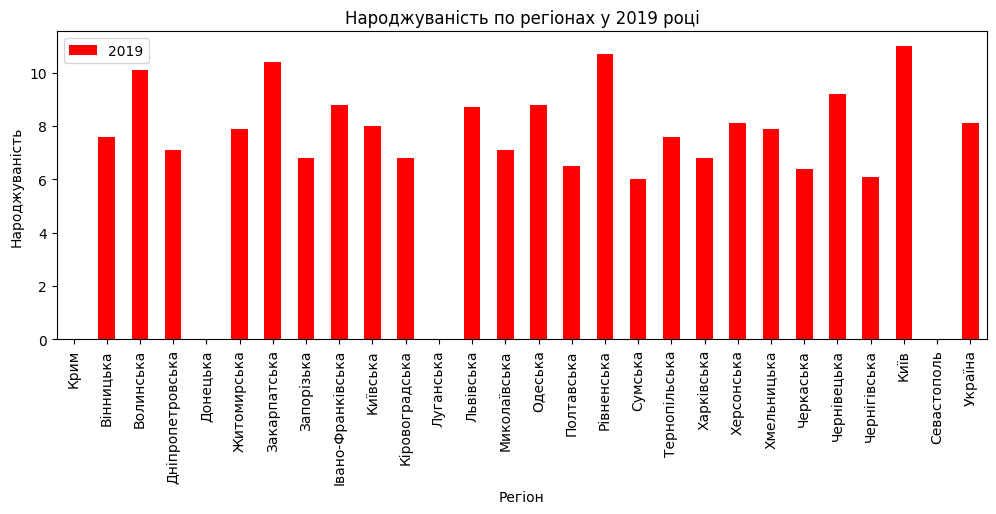

In [88]:
pl = df[["Регіон",'2019']].plot(figsize=(12,4),kind="bar",color = "red", x="Регіон", ylabel="Народжуваність", title="Народжуваність по регіонах у 2019 році")
plt.show()

Для кожного з попередніх завдань додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.





In [91]:

%matplotlib inline
import seaborn as sns

sns.set_style('whitegrid')

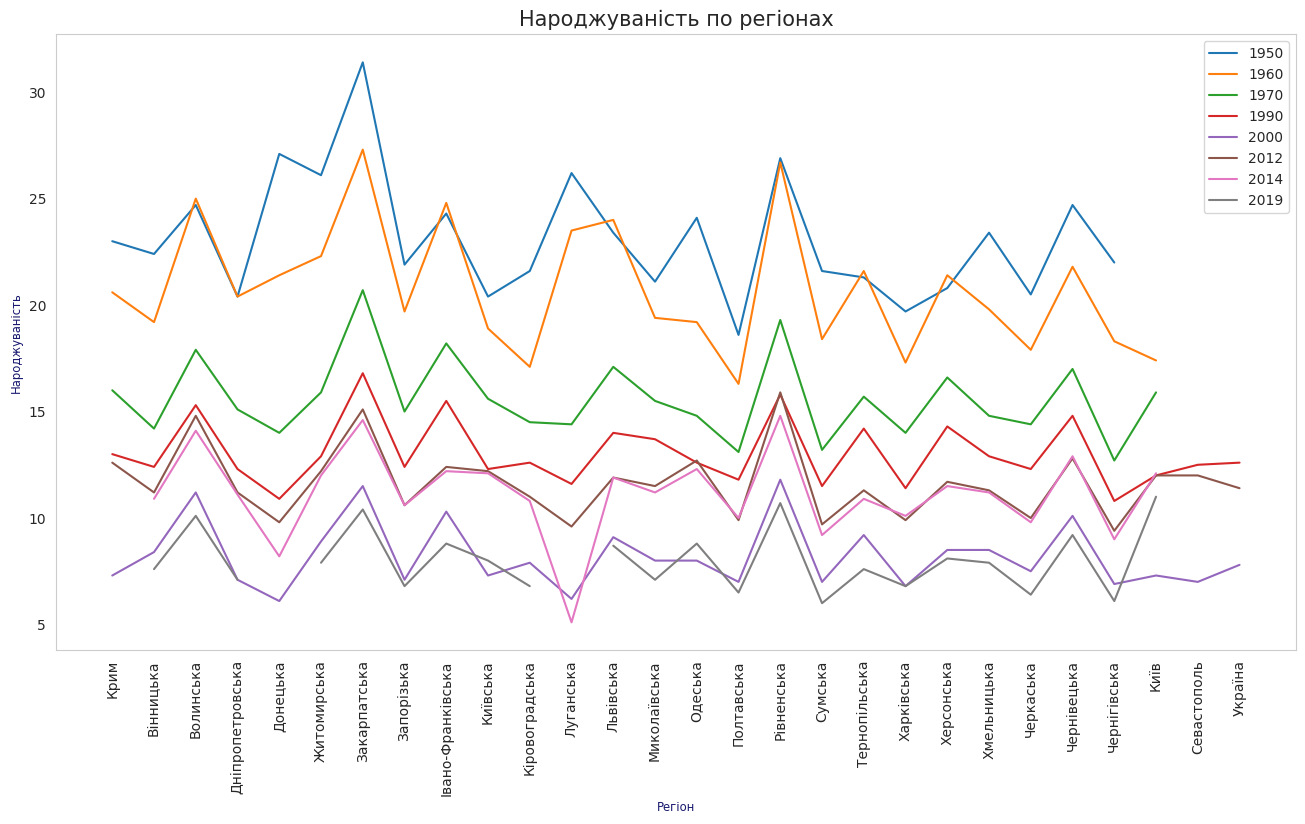

In [124]:

plt.figure(figsize=(16,8))


ax=plt.plot(df["Регіон"],df[df.columns[1:]], label=df.columns[1:])
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.show()


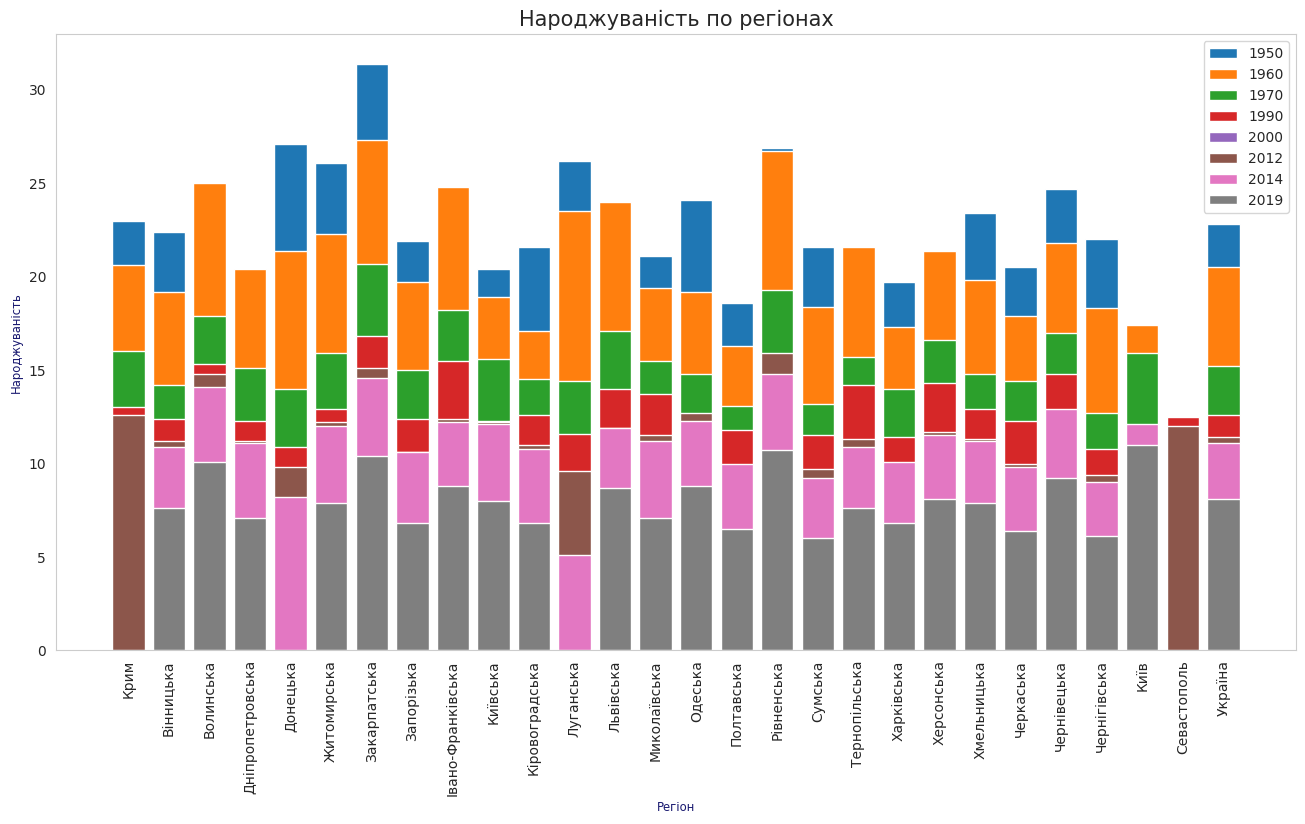

In [123]:
plt.figure(figsize=(16,8))

colnames = df.columns[1:]

for col in colnames:
  plt.bar(df["Регіон"],df[col],label=col)

plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.show()

[[0.12156863 0.46666667 0.70588235 1.        ]]
[[1.         0.49803922 0.05490196 1.        ]]
[[0.17254902 0.62745098 0.17254902 1.        ]]
[[0.83921569 0.15294118 0.15686275 1.        ]]
[[0.58039216 0.40392157 0.74117647 1.        ]]
[[0.54901961 0.3372549  0.29411765 1.        ]]
[[0.89019608 0.46666667 0.76078431 1.        ]]
[[0.49803922 0.49803922 0.49803922 1.        ]]


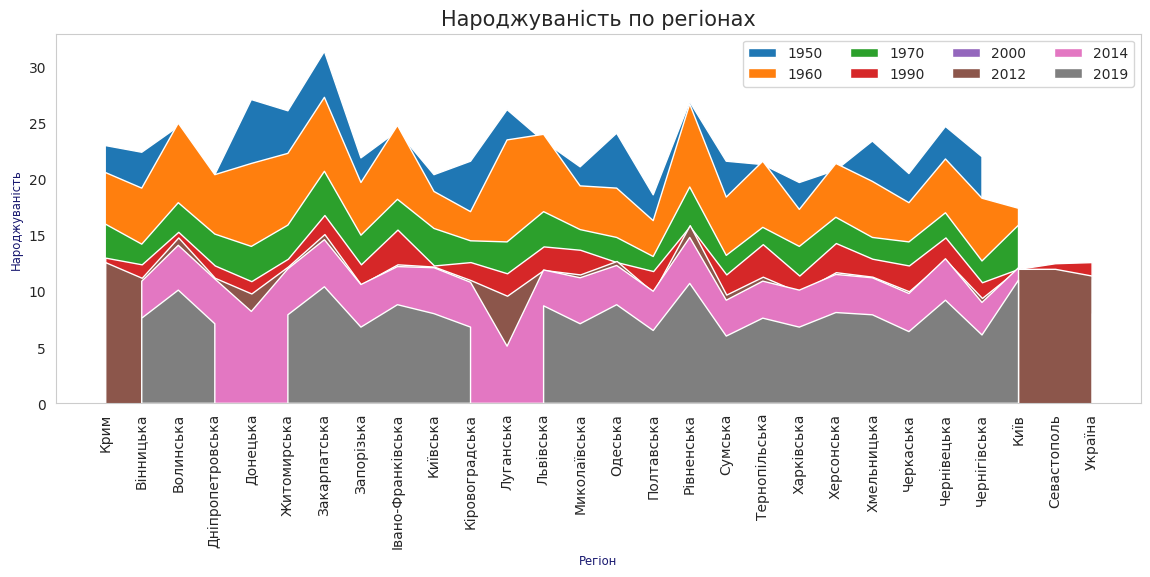

In [125]:
colnames = df.columns[1:]

f, ax = plt.subplots()
f.set_figwidth(14)

for col in colnames:
  ax2 = ax.stackplot(df["Регіон"],df[col], labels=[col])
  color = ax2[0].get_facecolor()
  print(color)

plt.xticks(rotation=90)
plt.legend(loc='best', ncols=colnames.size/2)
plt.grid()
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.show()
